<a href="https://colab.research.google.com/github/Isha307/Data-Analysis-Portfolio/blob/main/House_Property_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('/content/drive/MyDrive/house-prices-advanced-regression-techniques (1)/Copy of raw_sales.csv')

In [30]:
df.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [31]:
df.describe()

,postcode,price,bedrooms
count,29580.000000,2.958000e+04,29580.000000
mean,2730.249730,6.097363e+05,3.250169
std,146.717292,2.817079e+05,0.951275
min,2600.000000,5.650000e+04,0.000000
25%,2607.000000,4.400000e+05,3.000000
50%,2615.000000,5.500000e+05,3.000000
75%,2905.000000,7.050000e+05,4.000000
max,2914.000000,8.000000e+06,5.000000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datesold      29580 non-null  object
 1   postcode      29580 non-null  int64 
 2   price         29580 non-null  int64 
 3   propertyType  29580 non-null  object
 4   bedrooms      29580 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


# EDA
1. **Check for Missing Values**
2. **Explore about numerical Value**
3. **Explore about Categorical Value**
4. **Finding Relationship between features**

In [33]:
df.isnull().any() #Check for missing values

datesold        False
postcode        False
price           False
propertyType    False
bedrooms        False
dtype: bool

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datesold      29580 non-null  object
 1   postcode      29580 non-null  int64 
 2   price         29580 non-null  int64 
 3   propertyType  29580 non-null  object
 4   bedrooms      29580 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


**We can see two cloumns: Datesold and propertType is object, we need to change them to integer or float.**

In [35]:
df.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


At First, we'll work on propertyType.

In [36]:
df['propertyType'].value_counts()

propertyType
house    24552
unit      5028
Name: count, dtype: int64

In [37]:
df['propertyType'] = df['propertyType'].map({'house':0, 'unit':1})

In [38]:
df.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,0,4
1,2007-02-27 00:00:00,2906,290000,0,3
2,2007-03-07 00:00:00,2905,328000,0,3
3,2007-03-09 00:00:00,2905,380000,0,4
4,2007-03-21 00:00:00,2906,310000,0,3


In [39]:
df['propertyType']

0        0
1        0
2        0
3        0
4        0
        ..
29575    1
29576    1
29577    1
29578    1
29579    1
Name: propertyType, Length: 29580, dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datesold      29580 non-null  object
 1   postcode      29580 non-null  int64 
 2   price         29580 non-null  int64 
 3   propertyType  29580 non-null  int64 
 4   bedrooms      29580 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 1.1+ MB


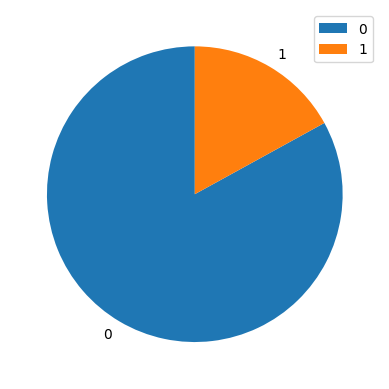

In [41]:
plt.pie(df['propertyType'].value_counts(),  labels = [0,1], startangle = 90)
plt.legend()
plt.show()

**We have changed the propertType into int64, Now we'll work on datesold.**

In [42]:
df['datesold'].unique()

array(['2007-02-07 00:00:00', '2007-02-27 00:00:00',
       '2007-03-07 00:00:00', ..., '2018-09-02 00:00:00',
       '2018-09-30 00:00:00', '2019-04-19 00:00:00'], dtype=object)

In [43]:
df['datesold'].value_counts()

datesold
2017-10-28 00:00:00    50
2017-11-18 00:00:00    39
2018-03-24 00:00:00    38
2017-11-11 00:00:00    37
2017-04-08 00:00:00    37
                       ..
2013-01-03 00:00:00     1
2013-01-12 00:00:00     1
2013-01-27 00:00:00     1
2013-02-09 00:00:00     1
2019-04-19 00:00:00     1
Name: count, Length: 3582, dtype: int64

In [44]:
df['datesold']= pd.to_datetime(df['datesold'])

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datesold      29580 non-null  datetime64[ns]
 1   postcode      29580 non-null  int64         
 2   price         29580 non-null  int64         
 3   propertyType  29580 non-null  int64         
 4   bedrooms      29580 non-null  int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 1.1 MB


In [46]:
print("Min date: {} \nMax date: {}".format(df.datesold.min(), df.datesold.max()))

Min date: 2007-02-07 00:00:00 
Max date: 2019-07-27 00:00:00


In [47]:
df['datesold'] = pd.to_datetime(df.datesold).dt.date

In [48]:
df['datesold']

0        2007-02-07
1        2007-02-27
2        2007-03-07
3        2007-03-09
4        2007-03-21
            ...    
29575    2019-07-25
29576    2019-07-25
29577    2019-07-26
29578    2019-07-26
29579    2019-07-26
Name: datesold, Length: 29580, dtype: object

In [53]:
df['datesold'] = pd.to_datetime(df.datesold).dt.year

In [54]:
df['datesold'].value_counts()

datesold
2017    4541
2016    3908
2018    3858
2015    3648
2014    2863
2013    2119
2012    1858
2011    1633
2010    1555
2009    1426
2019    1385
2008     639
2007     147
Name: count, dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   datesold      29580 non-null  int32
 1   postcode      29580 non-null  int64
 2   price         29580 non-null  int64
 3   propertyType  29580 non-null  int64
 4   bedrooms      29580 non-null  int64
dtypes: int32(1), int64(4)
memory usage: 1.0 MB


**We have converted the datesold into year sold to analyse the data easily.
Now Let's see some graph:**

In [59]:
df.datesold.value_counts()

datesold
2017    4541
2016    3908
2018    3858
2015    3648
2014    2863
2013    2119
2012    1858
2011    1633
2010    1555
2009    1426
2019    1385
2008     639
2007     147
Name: count, dtype: int64

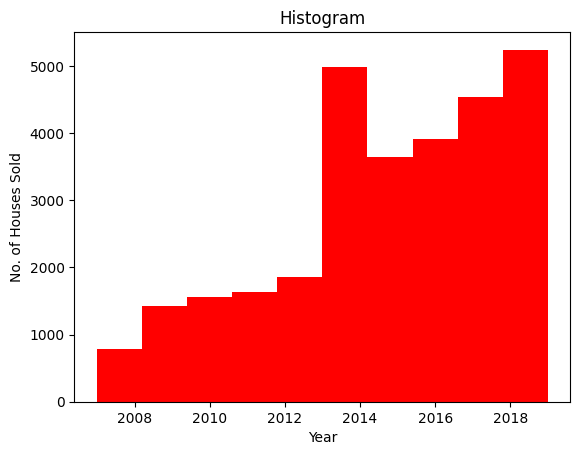

In [63]:
plt.hist(df.datesold , color='Red')
plt.title('Histogram')
plt.xlabel('Year')
plt.ylabel('No. of Houses Sold')
plt.show()

In [66]:
df.propertyType.value_counts()

propertyType
0    24552
1     5028
Name: count, dtype: int64

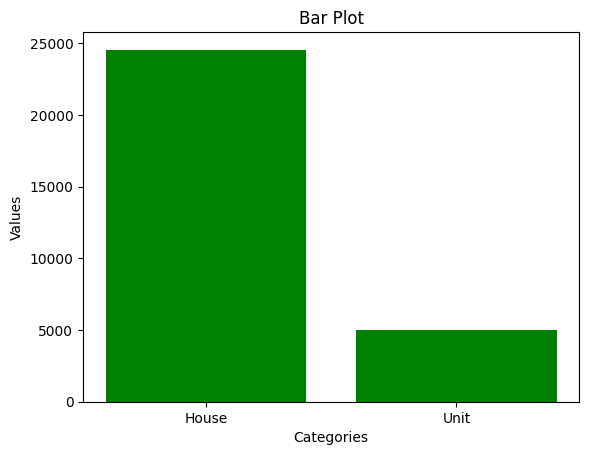

In [67]:
categories = ['House', 'Unit']
values = df['propertyType'].value_counts()
plt.bar(categories, values, color='green')
plt.title('Bar Plot')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()

In [68]:
df.bedrooms.value_counts()

bedrooms
3    11933
4    10442
2     3598
5     1950
1     1627
0       30
Name: count, dtype: int64

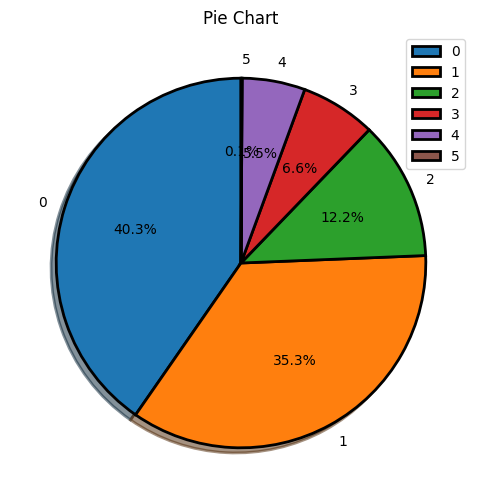

In [76]:
plt.figure(figsize=(8, 6))
plt.pie(df.bedrooms.value_counts(), labels=[0,1,2,3,4,5], autopct='%1.1f%%', startangle=90, shadow=True,wedgeprops={'linewidth': 2, 'edgecolor': 'black'})
plt.title('Pie Chart')
plt.legend()
plt.show()

In [78]:
df.postcode.unique()

array([2607, 2906, 2905, 2606, 2902, 2612, 2904, 2615, 2914, 2602, 2600,
       2605, 2603, 2611, 2903, 2617, 2913, 2604, 2614, 2912, 2601, 2900,
       2620, 2618, 2616, 2911, 2609])

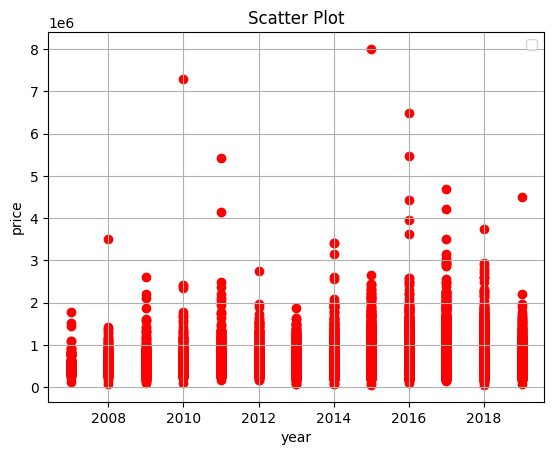

In [84]:
plt.scatter( df.datesold, df.price, color='red')
plt.title('Scatter Plot')
plt.xlabel('year')
plt.ylabel('price')
plt.legend()
plt.grid(True)
plt.show()

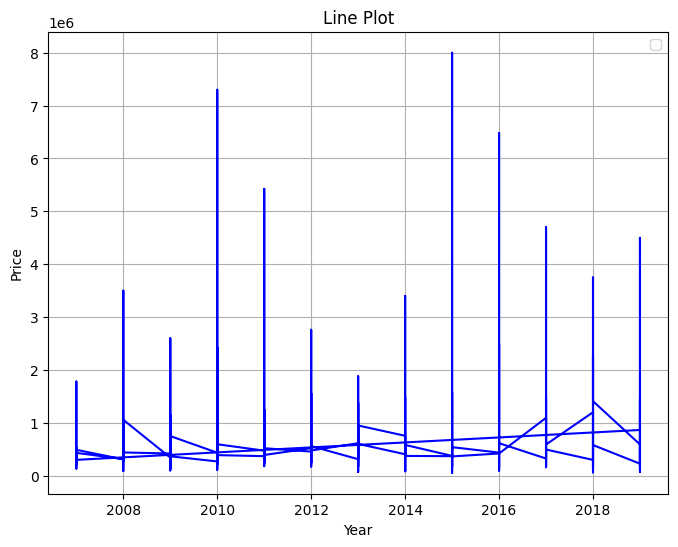

In [89]:
plt.figure(figsize=(8, 6))
plt.plot(df.datesold, df.price, color='blue')
plt.title('Line Plot')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   datesold      29580 non-null  int32
 1   postcode      29580 non-null  int64
 2   propertyType  29580 non-null  int64
 3   bedrooms      29580 non-null  int64
dtypes: int32(1), int64(3)
memory usage: 809.0 KB


In [91]:
Y = df['price']

In [92]:
df.drop(['price'], axis=1, inplace = True)

In [94]:
X = df

In [96]:
from sklearn.model_selection import train_test_split
x_train, x_test,  y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=5)

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, roc_curve, roc_auc_score, r2_score, mean_squared_error
from sklearn import metrics
from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis

models = {
    "Linear Regression": LinearRegression(fit_intercept=True),
    "KNN": KNeighborsClassifier(),
    "SVM" :SVC(),
    "SVM" :SVR(),
    "XGbr":XGBRegressor(),
    "SGD": SGDRegressor(),
    "Decisiontree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "LogisticRegression": LogisticRegression()
}

for model in models.items():
    m = model[1]
    m.fit(x_train, y_train)
    print(model[0])
    print("Score: ", m.score(x_test,y_test))
    print("")


Linear Regression
Score:  0.3206497464492941

KNN
Score:  0.00929682217714672

SVM
Score:  -0.041615664390196594

XGbr
Score:  0.6192300031933636

SGD
Score:  -1.4692455818983301e+19

Decisiontree
Score:  0.6016542963865312

RandomForest
Score:  0.6106075931174129

LogisticRegression
Score:  0.00828262339418526



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [98]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout

In [101]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Reshape data for Conv1D input
X_train_reshaped = np.expand_dims(X_train_scaled, axis=2)
X_test_reshaped = np.expand_dims(X_test_scaled, axis=2)

# Build CNN model
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))


Epoch 1/10
740/740 [==============================] - 7s 7ms/step - loss: 448716242944.0000 - val_loss: 445475749888.0000
Epoch 2/10
740/740 [==============================] - 2s 3ms/step - loss: 424176156672.0000 - val_loss: 400508190720.0000
Epoch 3/10
740/740 [==============================] - 2s 3ms/step - loss: 359392641024.0000 - val_loss: 319137546240.0000
Epoch 4/10
740/740 [==============================] - 2s 3ms/step - loss: 274155159552.0000 - val_loss: 233384853504.0000
Epoch 5/10
740/740 [==============================] - 2s 3ms/step - loss: 200377860096.0000 - val_loss: 170207248384.0000
Epoch 6/10
740/740 [==============================] - 3s 4ms/step - loss: 152335826944.0000 - val_loss: 131519537152.0000
Epoch 7/10
740/740 [==============================] - 3s 4ms/step - loss: 124314189824.0000 - val_loss: 109588152320.0000
Epoch 8/10
740/740 [==============================] - 2s 3ms/step - loss: 109613957120.0000 - val_loss: 96804806656.0000
Epoch 9/10
740/740 [=====

In [102]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Evaluate the model on the test set
y_pred = model.predict(X_test_reshaped)

# Calculate mean squared error and mean absolute error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

185/185 [==============================] - 2s 9ms/step
Mean Squared Error: 83264179446.15163
Mean Absolute Error: 184435.3199717926
